In [1]:
!date

Tue Feb 25 17:47:51 PST 2020


# Plot subsubclusters

In [2]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as scanp
from scipy.stats import ks_2samp, ttest_ind
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
isoform = anndata.read_h5ad("cell_ranger_annotation/isoform.h5ad")
gene =    anndata.read_h5ad("cell_ranger_annotation/gene.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


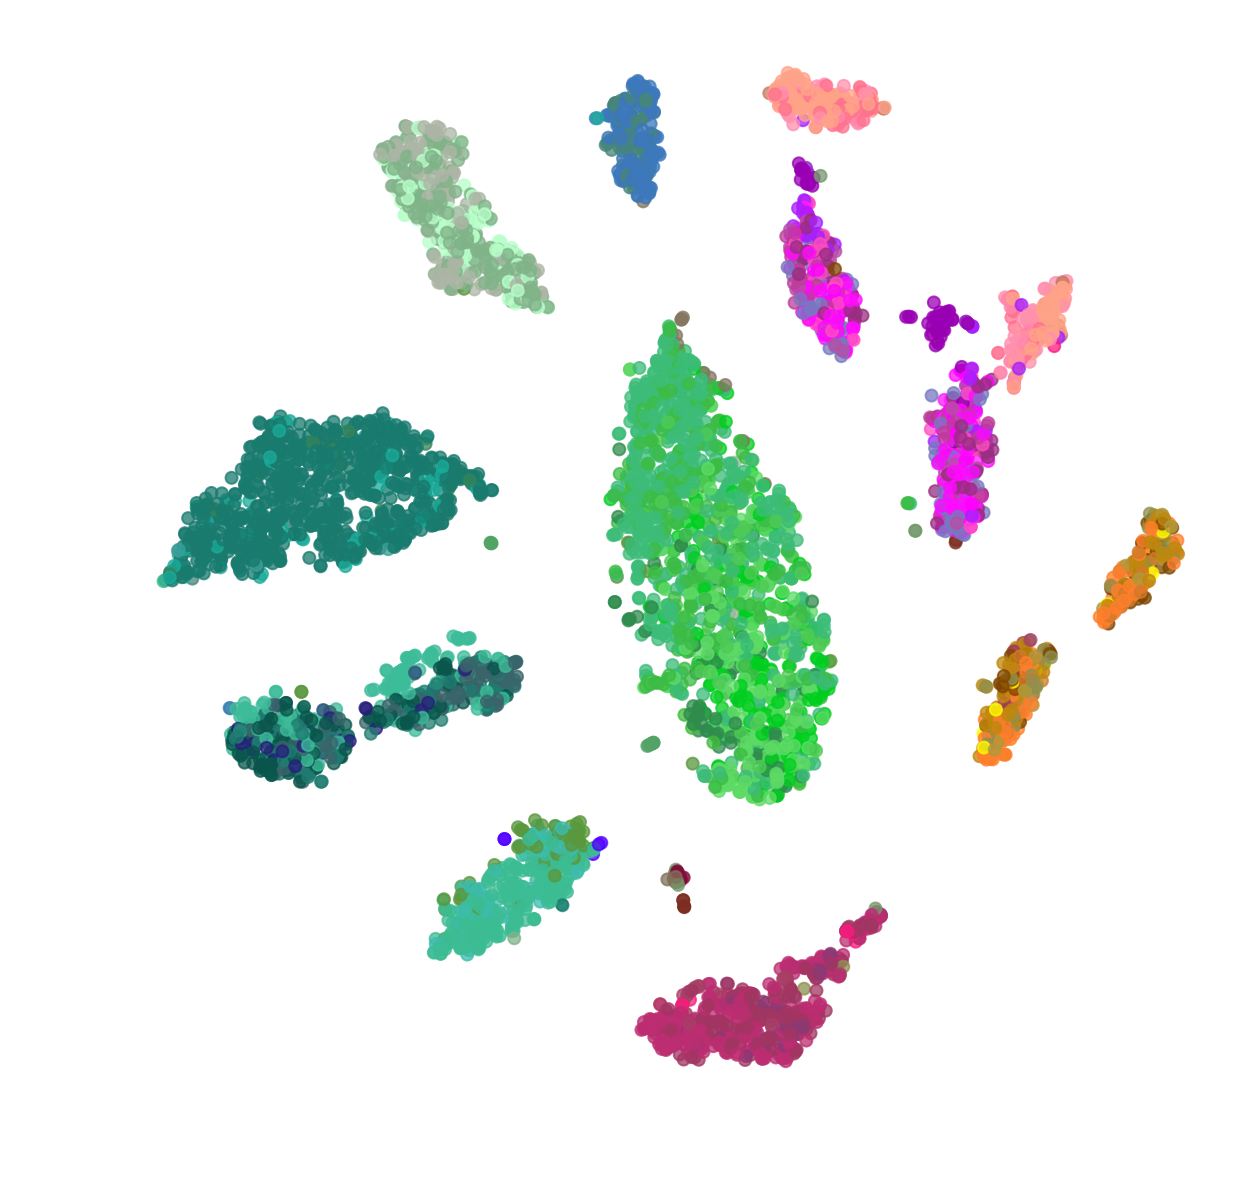

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["cluster_label"].unique().astype(str)
cmap = cm.get_cmap("tab20")

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = gene.obs["cluster_color"]

alpha = 0.75

ax.scatter(x, y, c=c, alpha=alpha)

#ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

#plt.savefig("./level_1_fig/subclass_nca.png", bbox_inches='tight', dpi=300)
plt.show()

In [22]:
isoform.var[isoform.var["gene_name"] == "Kalrn"]

transcript_id             gene_id gene_name transcript_name  \
Kalrn-212  ENSMUST00000114973  ENSMUSG00000061751     Kalrn       Kalrn-212   
Kalrn-214  ENSMUST00000132002  ENSMUSG00000061751     Kalrn       Kalrn-214   
Kalrn-201  ENSMUST00000076810  ENSMUSG00000061751     Kalrn       Kalrn-201   
Kalrn-220  ENSMUST00000231657  ENSMUSG00000061751     Kalrn       Kalrn-220   
Kalrn-209  ENSMUST00000114963  ENSMUSG00000061751     Kalrn       Kalrn-209   
Kalrn-211  ENSMUST00000114966  ENSMUSG00000061751     Kalrn       Kalrn-211   
Kalrn-217  ENSMUST00000142817  ENSMUSG00000061751     Kalrn       Kalrn-217   
Kalrn-210  ENSMUST00000114964  ENSMUSG00000061751     Kalrn       Kalrn-210   
Kalrn-221  ENSMUST00000232157  ENSMUSG00000061751     Kalrn       Kalrn-221   
Kalrn-208  ENSMUST00000114961  ENSMUSG00000061751     Kalrn       Kalrn-208   
Kalrn-207  ENSMUST00000114960  ENSMUSG00000061751     Kalrn       Kalrn-207   
Kalrn-206  ENSMUST00000114954  ENSMUSG00000061751     Kalrn       Kalrn-206   
Kalrn-202  ENSMUST00000089655  ENSMUSG00000061751     Kalrn       Kalrn-202   
Kalrn-205  ENSMUST00000114953  ENSMUSG00000061751     Kalrn       Kalrn-205   
Kalrn-204  ENSMUST00000114949  ENSMUSG00000061751     Kalrn       Kalrn-204   
Kalrn-218  ENSMUST00000151491  ENSMUSG00000061751     Kalrn       Kalrn-218   
Kalrn-203  ENSMUST00000114947  ENSMUSG00000061751     Kalrn       Kalrn-203   
Kalrn-216  ENSMUST00000137216  ENSMUSG00000061751     Kalrn       Kalrn-216   
Kalrn-213  ENSMUST00000124430  ENSMUSG00000061751     Kalrn       Kalrn-213   
Kalrn-219  ENSMUST00000156668  ENSMUSG00000061751     Kalrn       Kalrn-219   
Kalrn-215  ENSMUST00000132569  ENSMUSG00000061751     Kalrn       Kalrn-215   

                gene_TPM  highly_variable     means  dispersions  \
Kalrn-212  328276.593750            False  4.001370     4.770155   
Kalrn-214   50893.152344            False  2.215625     4.011566   
Kalrn-201   21103.158203            False  1.485527     4.339907   
Kalrn-220   12271.700195            False  1.093777     2.762500   
Kalrn-209   13207.299805            False  1.142046     3.242658   
Kalrn-211    4261.825684            False  0.519666     3.660835   
Kalrn-217    1977.242188            False  0.280284     3.479312   
Kalrn-210    8026.503906            False  0.841708     3.981231   
Kalrn-221   16809.031250            False  1.324506     3.894847   
Kalrn-208    7985.873535            False  0.838546     3.112716   
Kalrn-207   62968.589844            False  2.433530     4.264238   
Kalrn-206  276631.281250            False  3.835770     4.468244   
Kalrn-202   12307.219727            False  1.108395     3.903732   
Kalrn-205   17763.470703            False  1.371058     3.537380   
Kalrn-204   65843.359375            False  2.472577     4.276666   
Kalrn-218    2108.005127            False  0.292256     3.348042   
Kalrn-203   22576.507812            False  1.550839     3.827636   
Kalrn-216  226222.953125            False  3.644986     4.952091   
Kalrn-213   21351.921875            False  1.503732     3.412843   
Kalrn-219    2424.839111            False  0.334233     1.804926   
Kalrn-215   14443.864258            False  1.212069     3.179760   

           dispersions_norm  
Kalrn-212          0.312355  
Kalrn-214         -0.111810  
Kalrn-201          0.791757  
Kalrn-220         -1.151703  
Kalrn-209         -0.560119  
Kalrn-211          0.263236  
Kalrn-217          0.628770  
Kalrn-210          0.615337  
Kalrn-221          0.243417  
Kalrn-208         -0.339124  
Kalrn-207          0.249939  
Kalrn-206         -0.026670  
Kalrn-202          0.254363  
Kalrn-205         -0.197004  
Kalrn-204          0.267733  
Kalrn-218          0.491356  
Kalrn-203         -0.117009  
Kalrn-216          0.819659  
Kalrn-213         -0.667240  
Kalrn-219         -1.123979  
Kalrn-215         -0.637613

In [ ]:
specific_gene = "Ccdc12"
specific_isoform = specific_gene + "-" + "210"
specific_cluster = "L6 CT Grp_1"

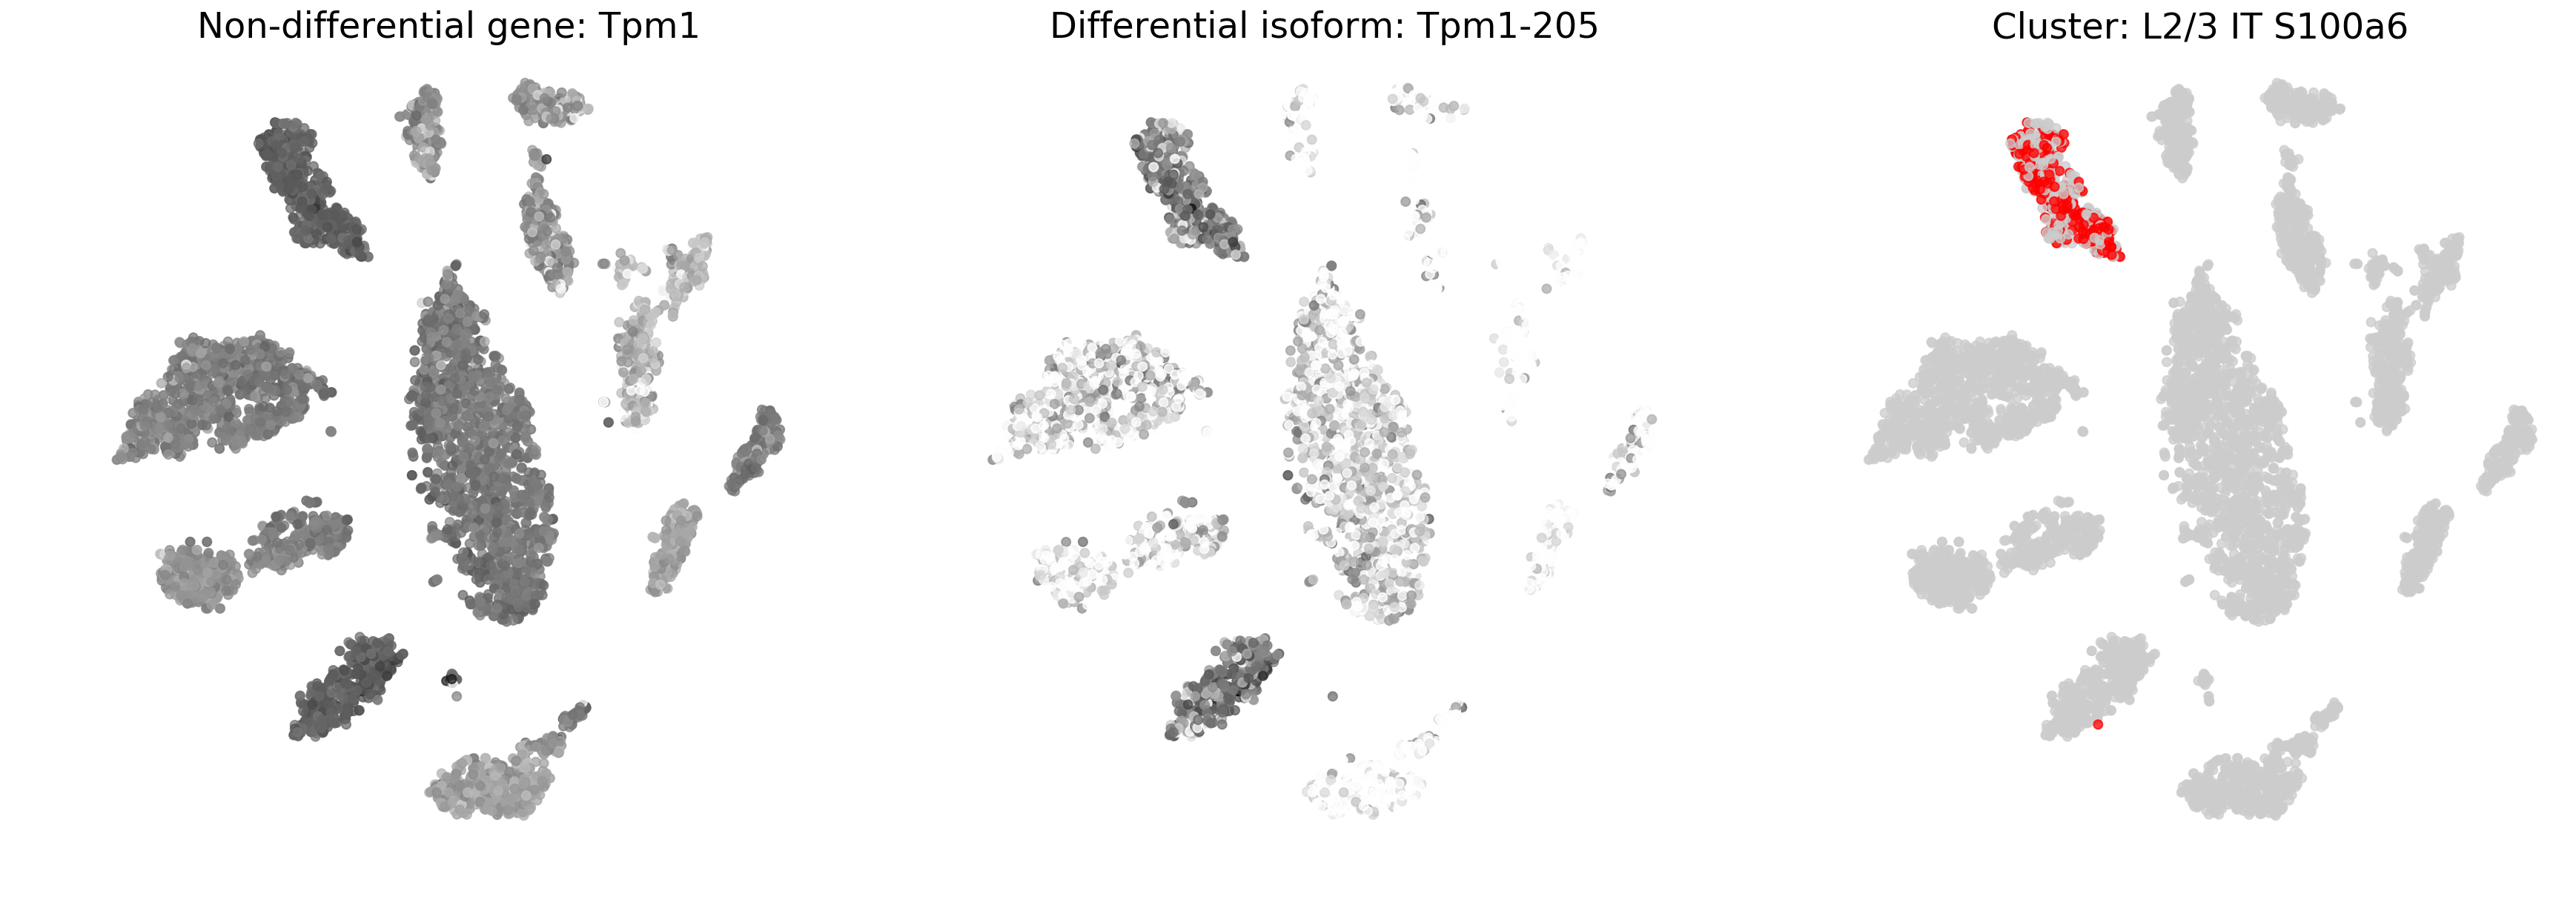

In [80]:
specific_gene = "Tpm1"
specific_isoform = specific_gene + "-" + "205"
specific_cluster = "L2/3 IT S100a6"
complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(30,10), ncols=3)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(gene[:, gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[0].set_title("Non-differential gene: {}".format(specific_gene))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Differential isoform: {}".format(specific_isoform))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]


c = ["red"]*gene.shape[0]

indices = np.where(gene.obs["cluster_label"]!=specific_cluster)[0]
replacements=[complement_color]*len(indices)
for (index, replacement) in zip(indices, replacements):
    c[index] = replacement
alpha=0.75
cmap="nipy_spectral_r"

ax[2].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[2].set_axis_off()
ax[2].set_title("Cluster: {}".format(specific_cluster))
tmp_save_name = "".join(specific_cluster.split("/"))
plt.savefig("./level_3_fig/hidden_gene_nca_{}-{}.png".format(tmp_save_name, specific_gene), bbox_inches='tight',dpi=300)
plt.show()

In [76]:
# Dlx1 gene marker glut vs gaba, and gad1, and i think gnal

In [77]:
"".join(specific_cluster.split("/"))

'L23 IT S100a6'

In [78]:
gene.obs["cluster_color"][gene.obs["cluster_label"]==specific_cluster][0]

'#81B389'

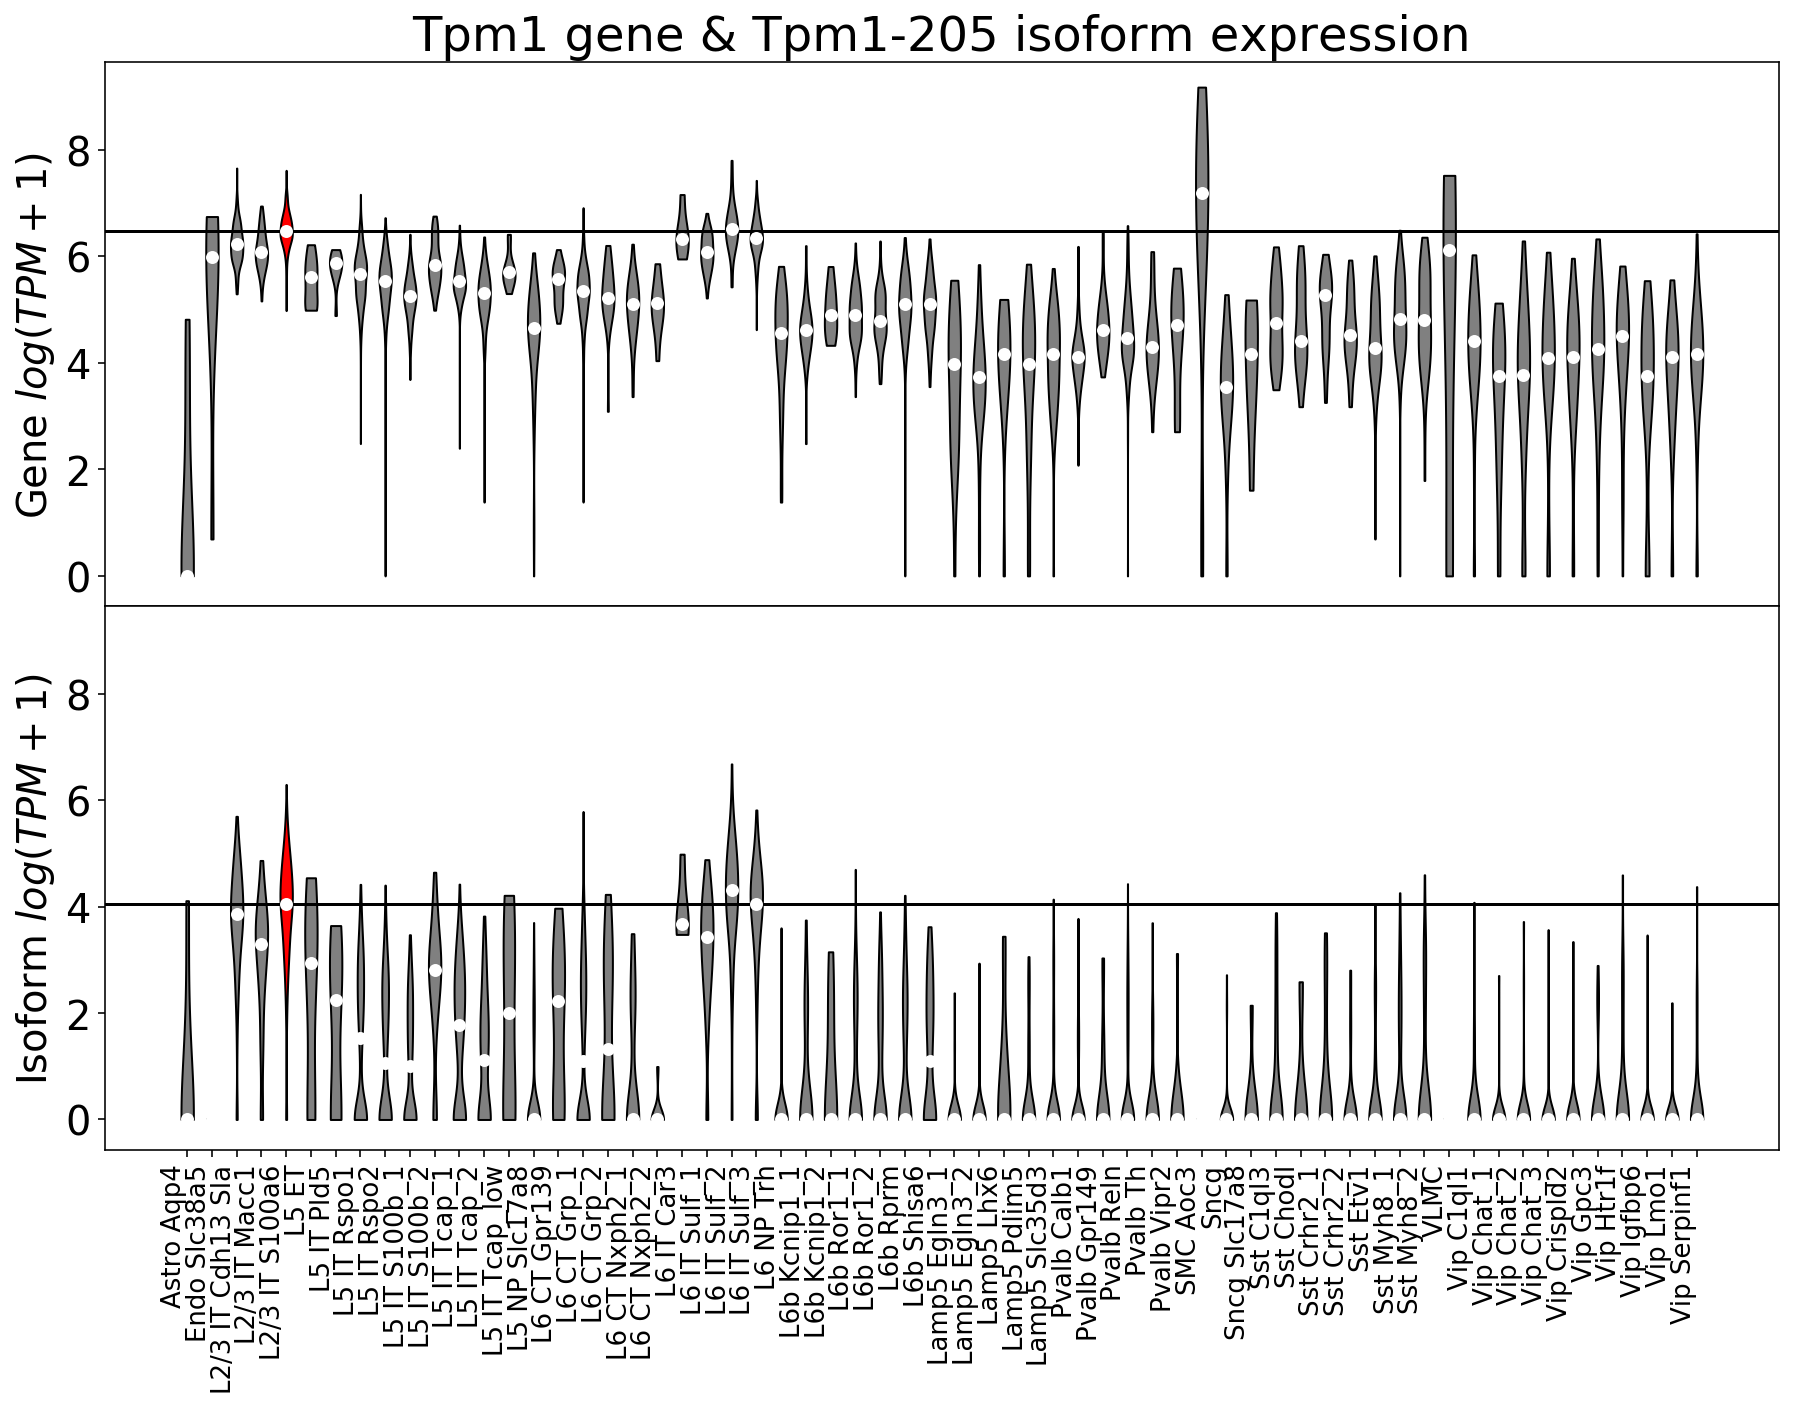

In [81]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

specific_cluster_color = "red"

unique = np.unique(gene.obs.cluster_label)
#unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(gene[gene.obs.cluster_label==c][:,gene.var.gene_name==specific_gene].layers["log1p"]).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=True, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(specific_cluster_color)

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("Gene $log(TPM + 1)$")
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.cluster_label==c][:,isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=True, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(specific_cluster_color)

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=90, ha="right", fontsize=13)
ax[1].set_ylabel("Isoform $log(TPM + 1)$")
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("{} gene & {} isoform expression".format(specific_gene, specific_isoform))
plt.savefig("./level_3_fig/hidden_gene_violin_{}-{}.png".format(tmp_save_name, specific_gene), bbox_inches='tight',dpi=300)
plt.show()

In [100]:
adata = gene[gene.obs.subclass_label=="L2/3 IT"]

In [101]:
adata

View of AnnData object with n_obs × n_vars = 482 × 20586 
    obs: 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size', 'cell_id', 'subclass_id', 'class_id', 'cell_TPM', 'percent_mito', 'n_genes', 'pass_count_filter', 'leiden', 'louvain'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'txn_list', 'num_isoforms', 'gene_TPM', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'louvain', 'neighbors'
    obsm: 'X_nca', 'X_nca_tsne', 'X_pca', 'X_pca_tsne'
    layers: 'X', 'log1p'

In [102]:
num_NCA = 10
state = 42
num_TSNE = 2

In [107]:
# NCA
X = adata.X
y = adata.obs.cluster_id.values.astype(int)

nca = NeighborhoodComponentsAnalysis(n_components=2,random_state=state)
Y = nca.fit_transform(X, y)

In [104]:
metric="euclidean"

In [105]:
tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
YY = tsne.fit_transform(X)

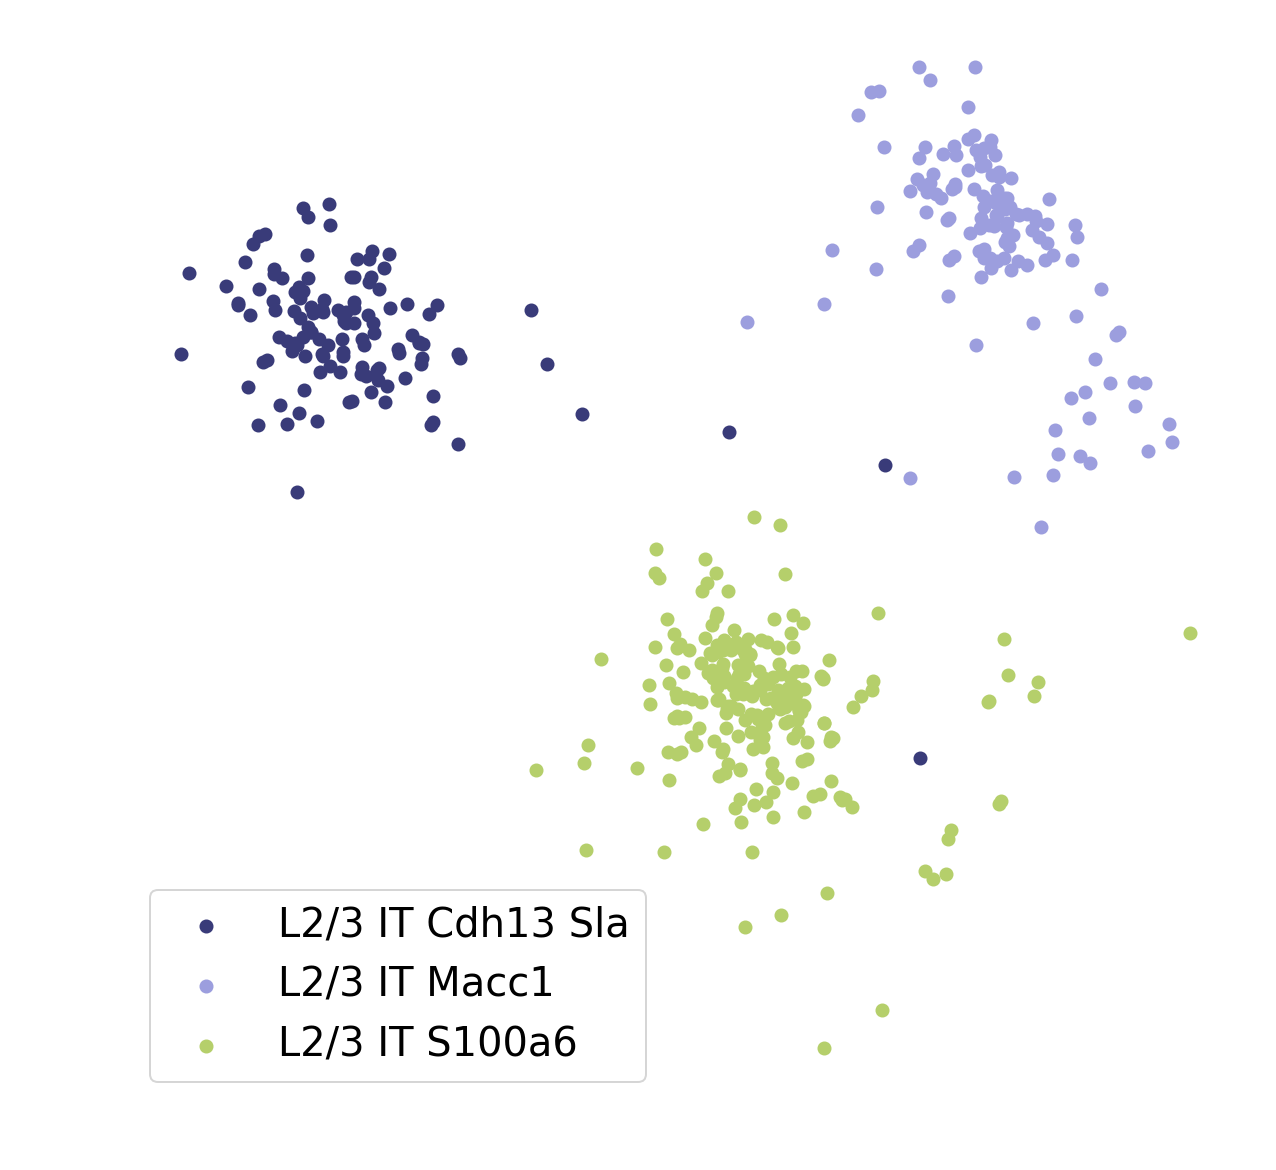

In [119]:
fig, ax = plt.subplots(figsize=(10,10))

x = Y[:,0]
y = Y[:,1]
c = cm.get_cmap("tab20b")
assignments = adata.obs.cluster_label.values
unique = np.unique(assignments)

for uidx, u in enumerate(unique):
    mask = assignments==u
    xx = x[mask]
    yy = y[mask]
    ax.scatter(xx, yy, color=c(uidx*3), cmap="tab20b", label=u)

ax.legend()

ax.set_axis_off()
plt.show()

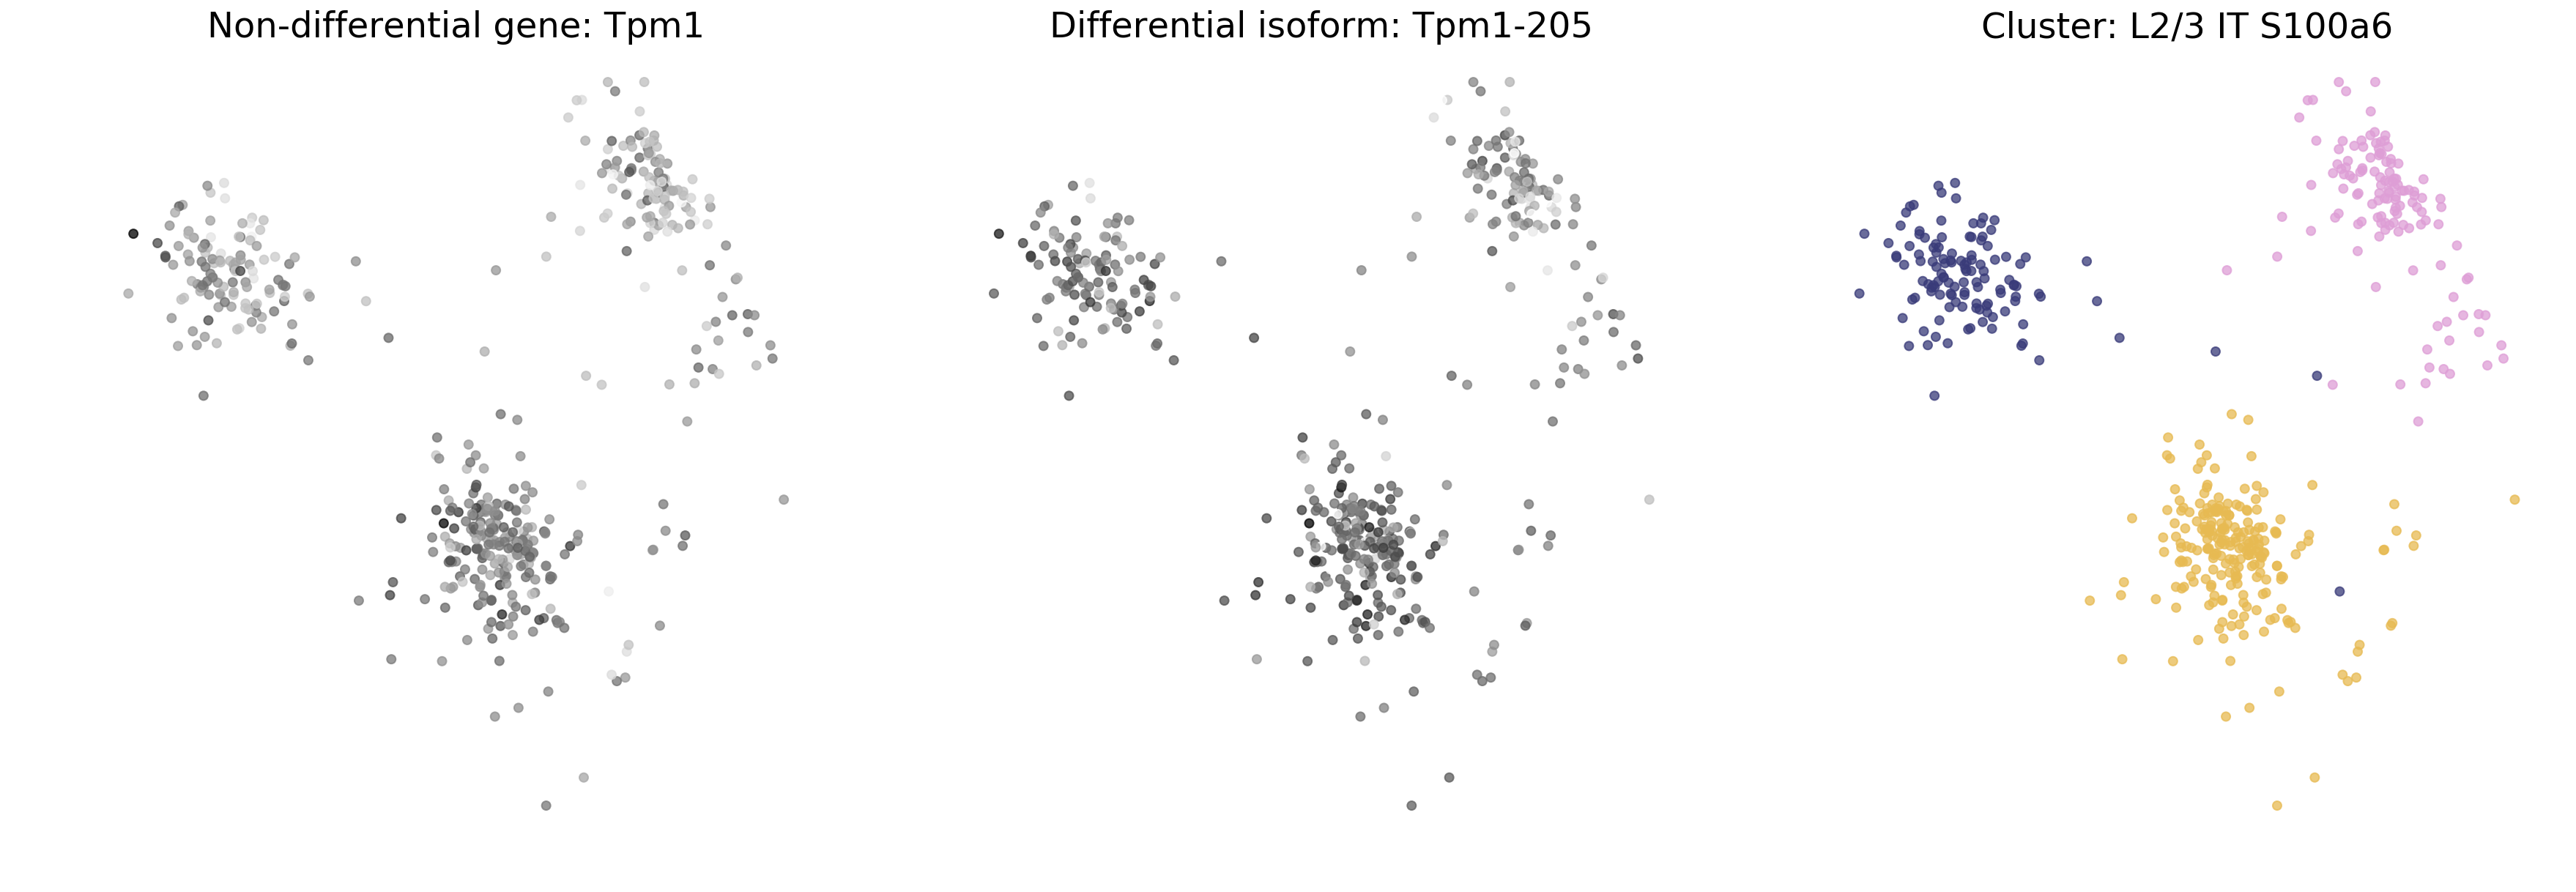

In [120]:
specific_gene = "Tpm1"
specific_isoform = specific_gene + "-" + "205"
specific_cluster = "L2/3 IT S100a6"
specific_subclass = "L2/3 IT"
complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(30,10), ncols=3)

x = Y[:,0]
y = Y[:,1]
c = np.asarray(adata[:, adata.var.gene_name==specific_gene].layers["log1p"]).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[0].set_title("Non-differential gene: {}".format(specific_gene))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = Y[:,0]
y = Y[:,1]
c = np.asarray(isoform[isoform.obs.subclass_label==specific_subclass][:, isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Differential isoform: {}".format(specific_isoform))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

x = Y[:,0]
y = Y[:,1]

c = adata.obs["cluster_id"].values.astype(int)

ax[2].scatter(x, y, c=c, cmap="tab20b", alpha=alpha)
ax[2].set_axis_off()
ax[2].set_title("Cluster: {}".format(specific_cluster))
tmp_save_name = "".join(specific_cluster.split("/"))
#plt.savefig("./level_3_fig/hidden_gene_nca_{}-{}.png".format(tmp_save_name, specific_gene), bbox_inches='tight',dpi=300)
plt.show()

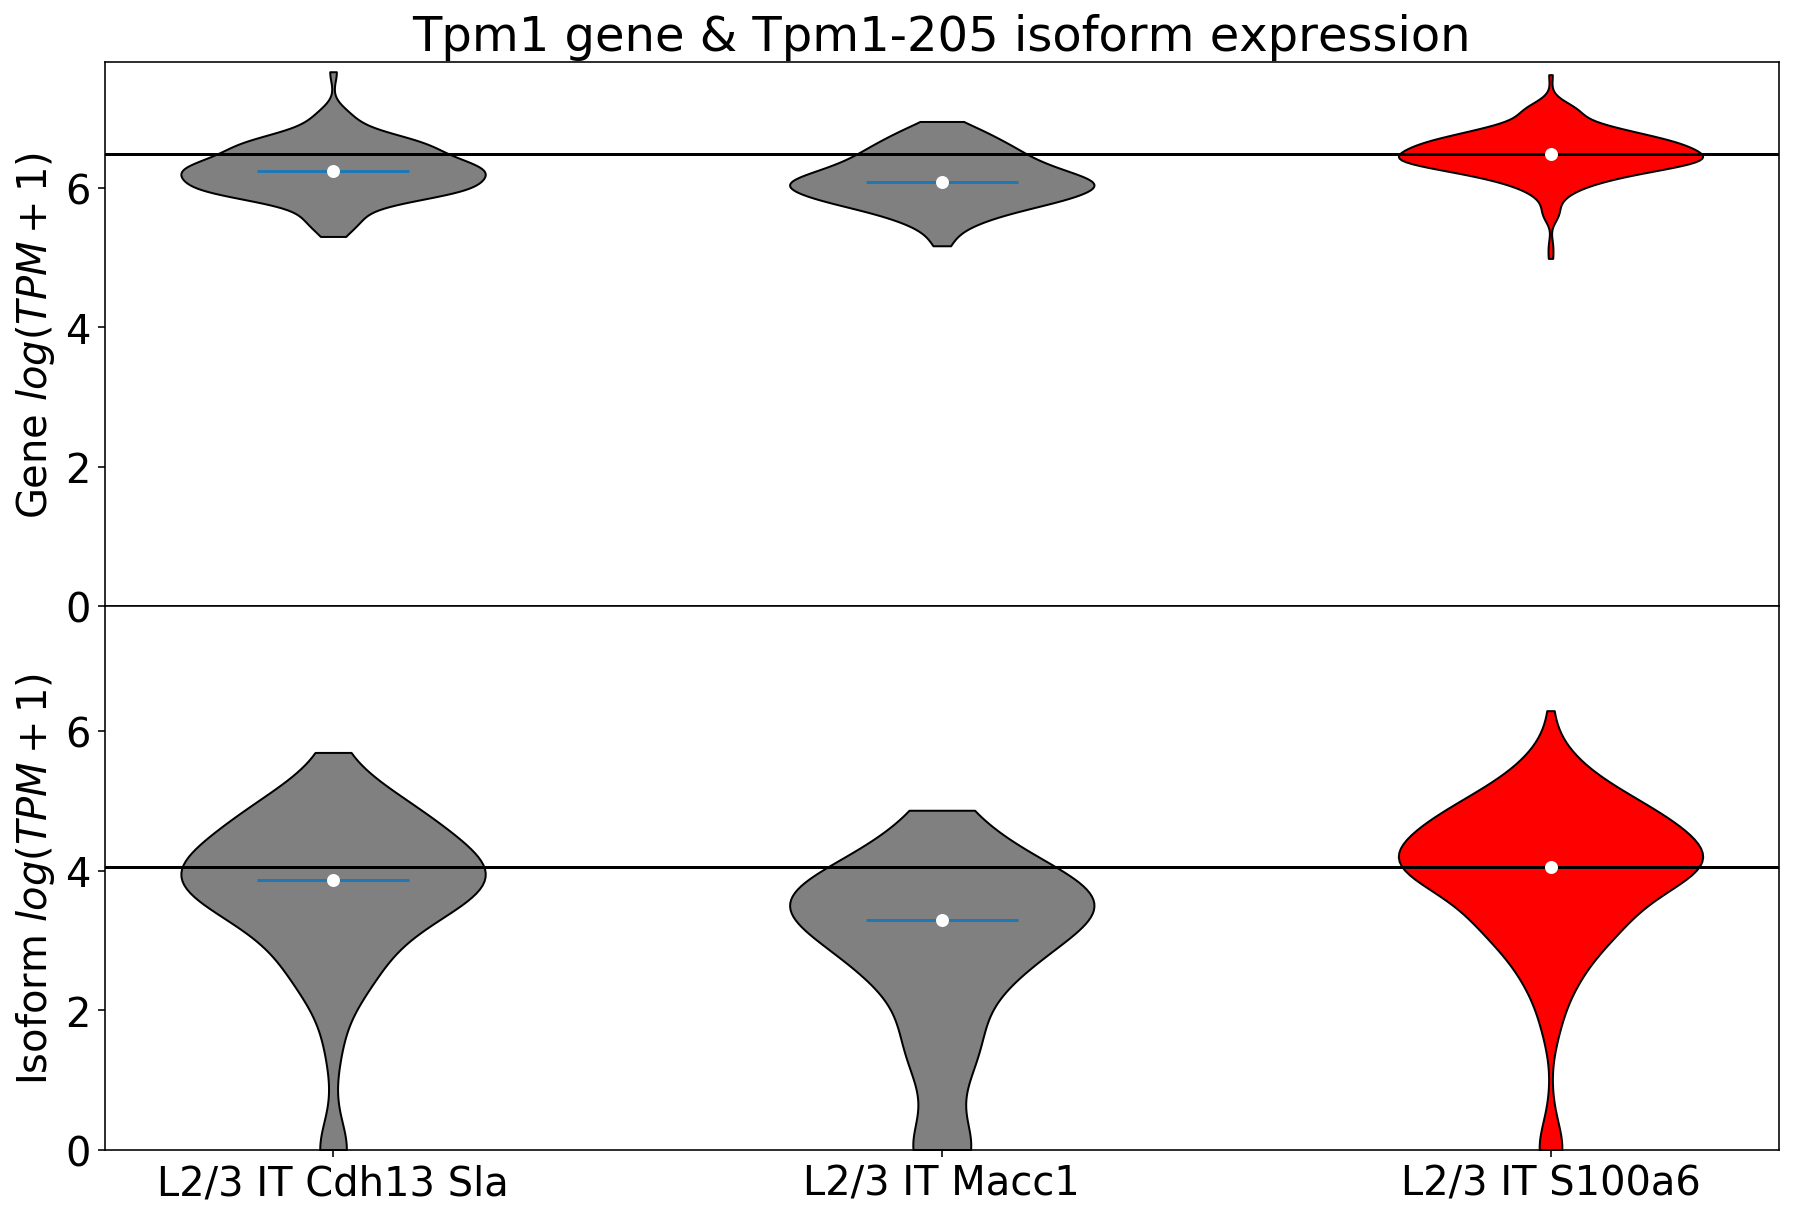

In [123]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

specific_cluster_color = "red"

unique = np.unique(adata.obs.cluster_label)
#unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(adata[adata.obs.cluster_label==c][:,adata.var.gene_name==specific_gene].layers["log1p"]).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=True, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(specific_cluster_color)

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("Gene $log(TPM + 1)$")
ax[0].set_ylim(0)
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.cluster_label==c][:,isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=True, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(specific_cluster_color)

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=00, ha="center", fontsize=20)
ax[1].set_ylabel("Isoform $log(TPM + 1)$")
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("{} gene & {} isoform expression".format(specific_gene, specific_isoform))
#plt.savefig("./level_3_fig/hidden_gene_violin_{}-{}.png".format(tmp_save_name, specific_gene), bbox_inches='tight',dpi=300)
plt.show()

# Second example

In [145]:
adata = gene[gene.obs.subclass_label=="L5 IT"]

In [146]:
adata

View of AnnData object with n_obs × n_vars = 1560 × 20586 
    obs: 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size', 'cell_id', 'subclass_id', 'class_id', 'cell_TPM', 'percent_mito', 'n_genes', 'pass_count_filter', 'leiden', 'louvain'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'txn_list', 'num_isoforms', 'gene_TPM', 'dispersion', 'pass_disp_filter', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'louvain', 'neighbors'
    obsm: 'X_nca', 'X_nca_tsne', 'X_pca', 'X_pca_tsne'
    layers: 'X', 'log1p'

In [262]:
num_NCA = 2
state = 42
num_TSNE = 2
num_PCA = 1000

In [263]:
X = adata.X

tsvd = TruncatedSVD(n_components=num_PCA)
Y = tsvd.fit_transform(X)

In [264]:
# NCA
X = Y
y = adata.obs.cluster_id.values.astype(int)

nca = NeighborhoodComponentsAnalysis(n_components=num_NCA,random_state=state)
YY = nca.fit_transform(X, y)

In [259]:
metric="euclidean"

In [260]:
X = YY
tsne = TSNE(n_components=num_TSNE, metric=metric, random_state=state)
YYY = tsne.fit_transform(X)

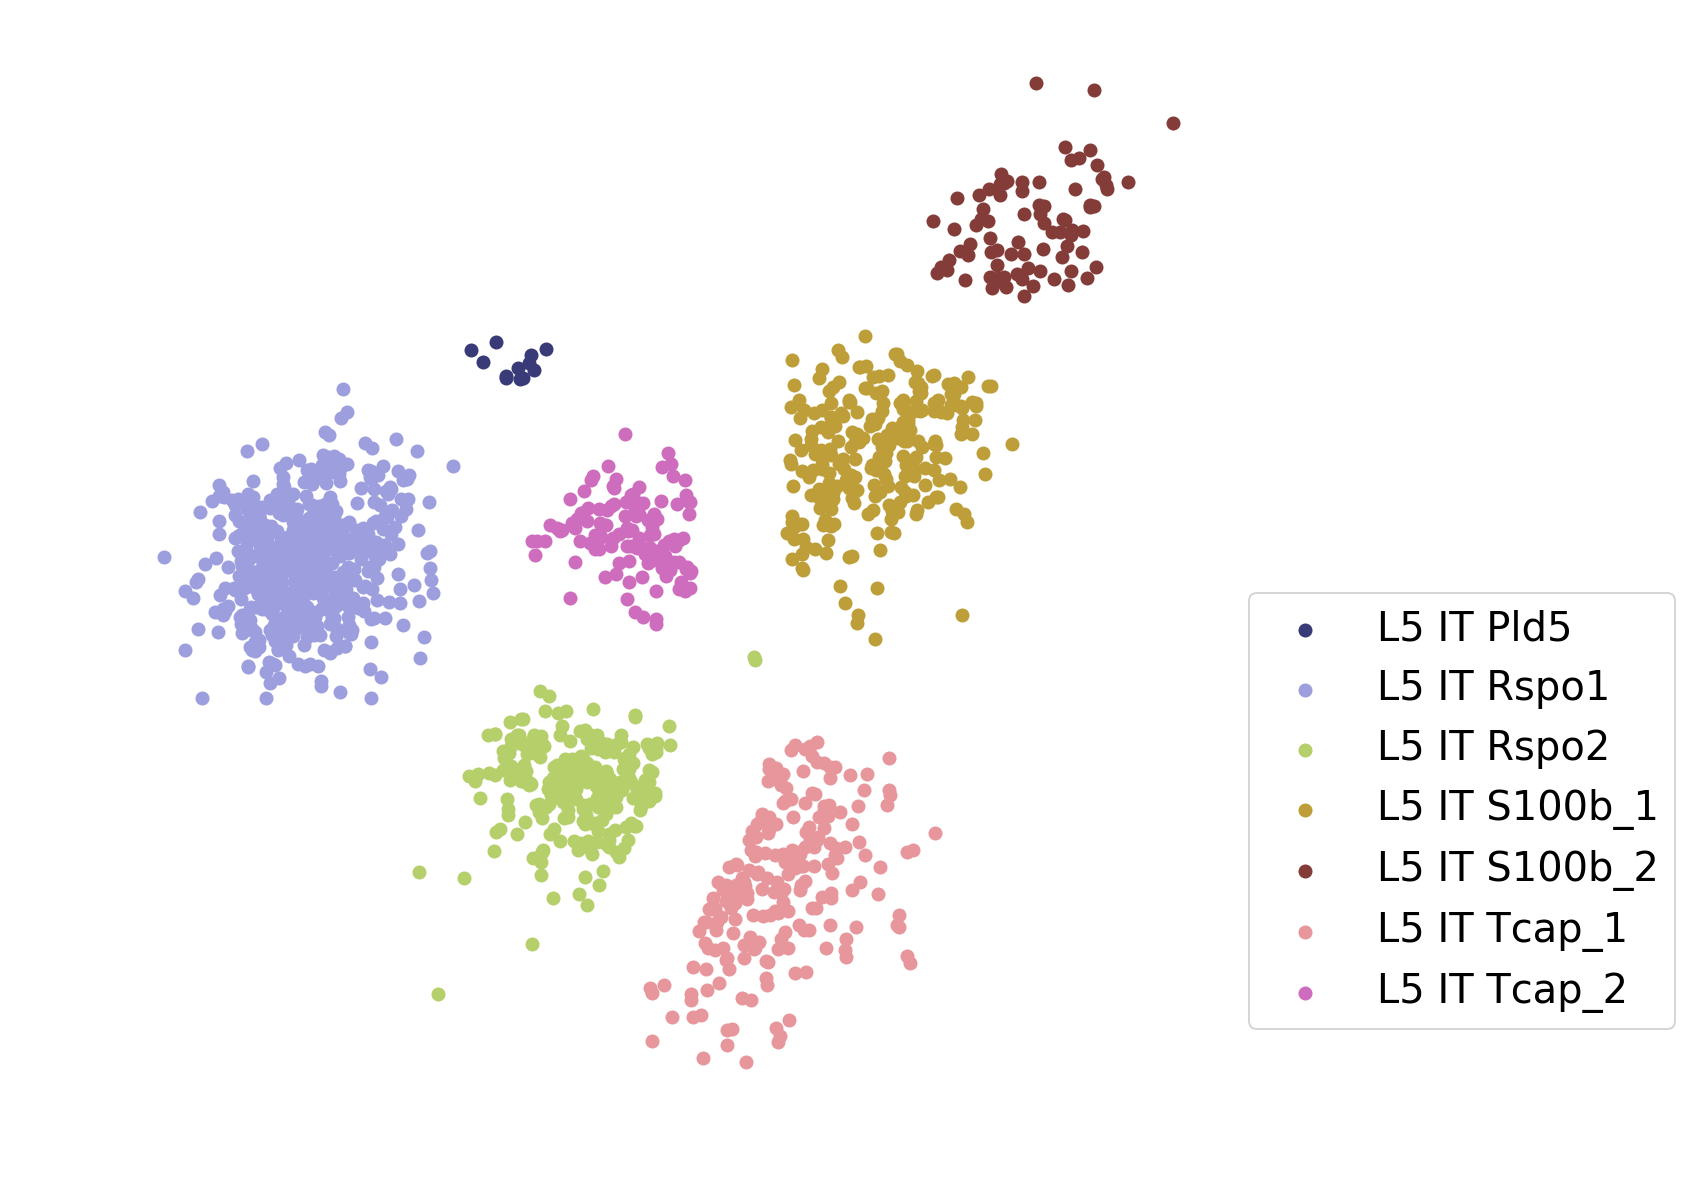

In [265]:
fig, ax = plt.subplots(figsize=(10,10))

x = YY[:,0]
y = YY[:,1]
c = cm.get_cmap("tab20b")
assignments = adata.obs.cluster_label.values
unique = np.unique(assignments)

for uidx, u in enumerate(unique):
    mask = assignments==u
    xx = x[mask]
    yy = y[mask]
    ax.scatter(xx, yy, color=c(uidx*3), cmap="tab20b", label=u)

ax.legend(bbox_to_anchor=(1, 0.5))

ax.set_axis_off()
plt.show()

In [175]:
specific_gene = "Pantr1"
specific_isoform = specific_gene + "-" + "209"
specific_cluster = "L5 IT Rspo1"
specific_subclass = "L5 IT"

In [193]:
specific_gene = "Rcan2"
specific_isoform = specific_gene + "-" + "201"
specific_cluster = "L5 IT Pld5"
specific_subclass = "L5 IT"

In [194]:
isoform[:,isoform.var.gene_name==specific_gene].var

transcript_id             gene_id gene_name transcript_name  \
Rcan2-204  ENSMUST00000228972  ENSMUSG00000039601     Rcan2       Rcan2-204   
Rcan2-206  ENSMUST00000229744  ENSMUSG00000039601     Rcan2       Rcan2-206   
Rcan2-202  ENSMUST00000044895  ENSMUSG00000039601     Rcan2       Rcan2-202   
Rcan2-203  ENSMUST00000177857  ENSMUSG00000039601     Rcan2       Rcan2-203   
Rcan2-201  ENSMUST00000044792  ENSMUSG00000039601     Rcan2       Rcan2-201   
Rcan2-205  ENSMUST00000229240  ENSMUSG00000039601     Rcan2       Rcan2-205   
Rcan2-207  ENSMUST00000229939  ENSMUSG00000039601     Rcan2       Rcan2-207   

               gene_TPM  highly_variable     means  dispersions  \
Rcan2-204  4.263539e+04            False  2.066938     3.760897   
Rcan2-206  1.929794e+05            False  3.483256     4.899922   
Rcan2-202  4.828869e+05             True  4.375909     5.557741   
Rcan2-203  1.203594e+05            False  3.025328     4.655144   
Rcan2-201  1.537349e+06             True  5.529090     6.629702   
Rcan2-205  2.087629e+04            False  1.481101     3.595529   
Rcan2-207  2.082828e+03            False  0.290542     2.960459   

           dispersions_norm  
Rcan2-204         -0.470693  
Rcan2-206          0.728408  
Rcan2-202          1.790300  
Rcan2-203          0.476284  
Rcan2-201          2.658137  
Rcan2-205         -0.125360  
Rcan2-207          0.085633

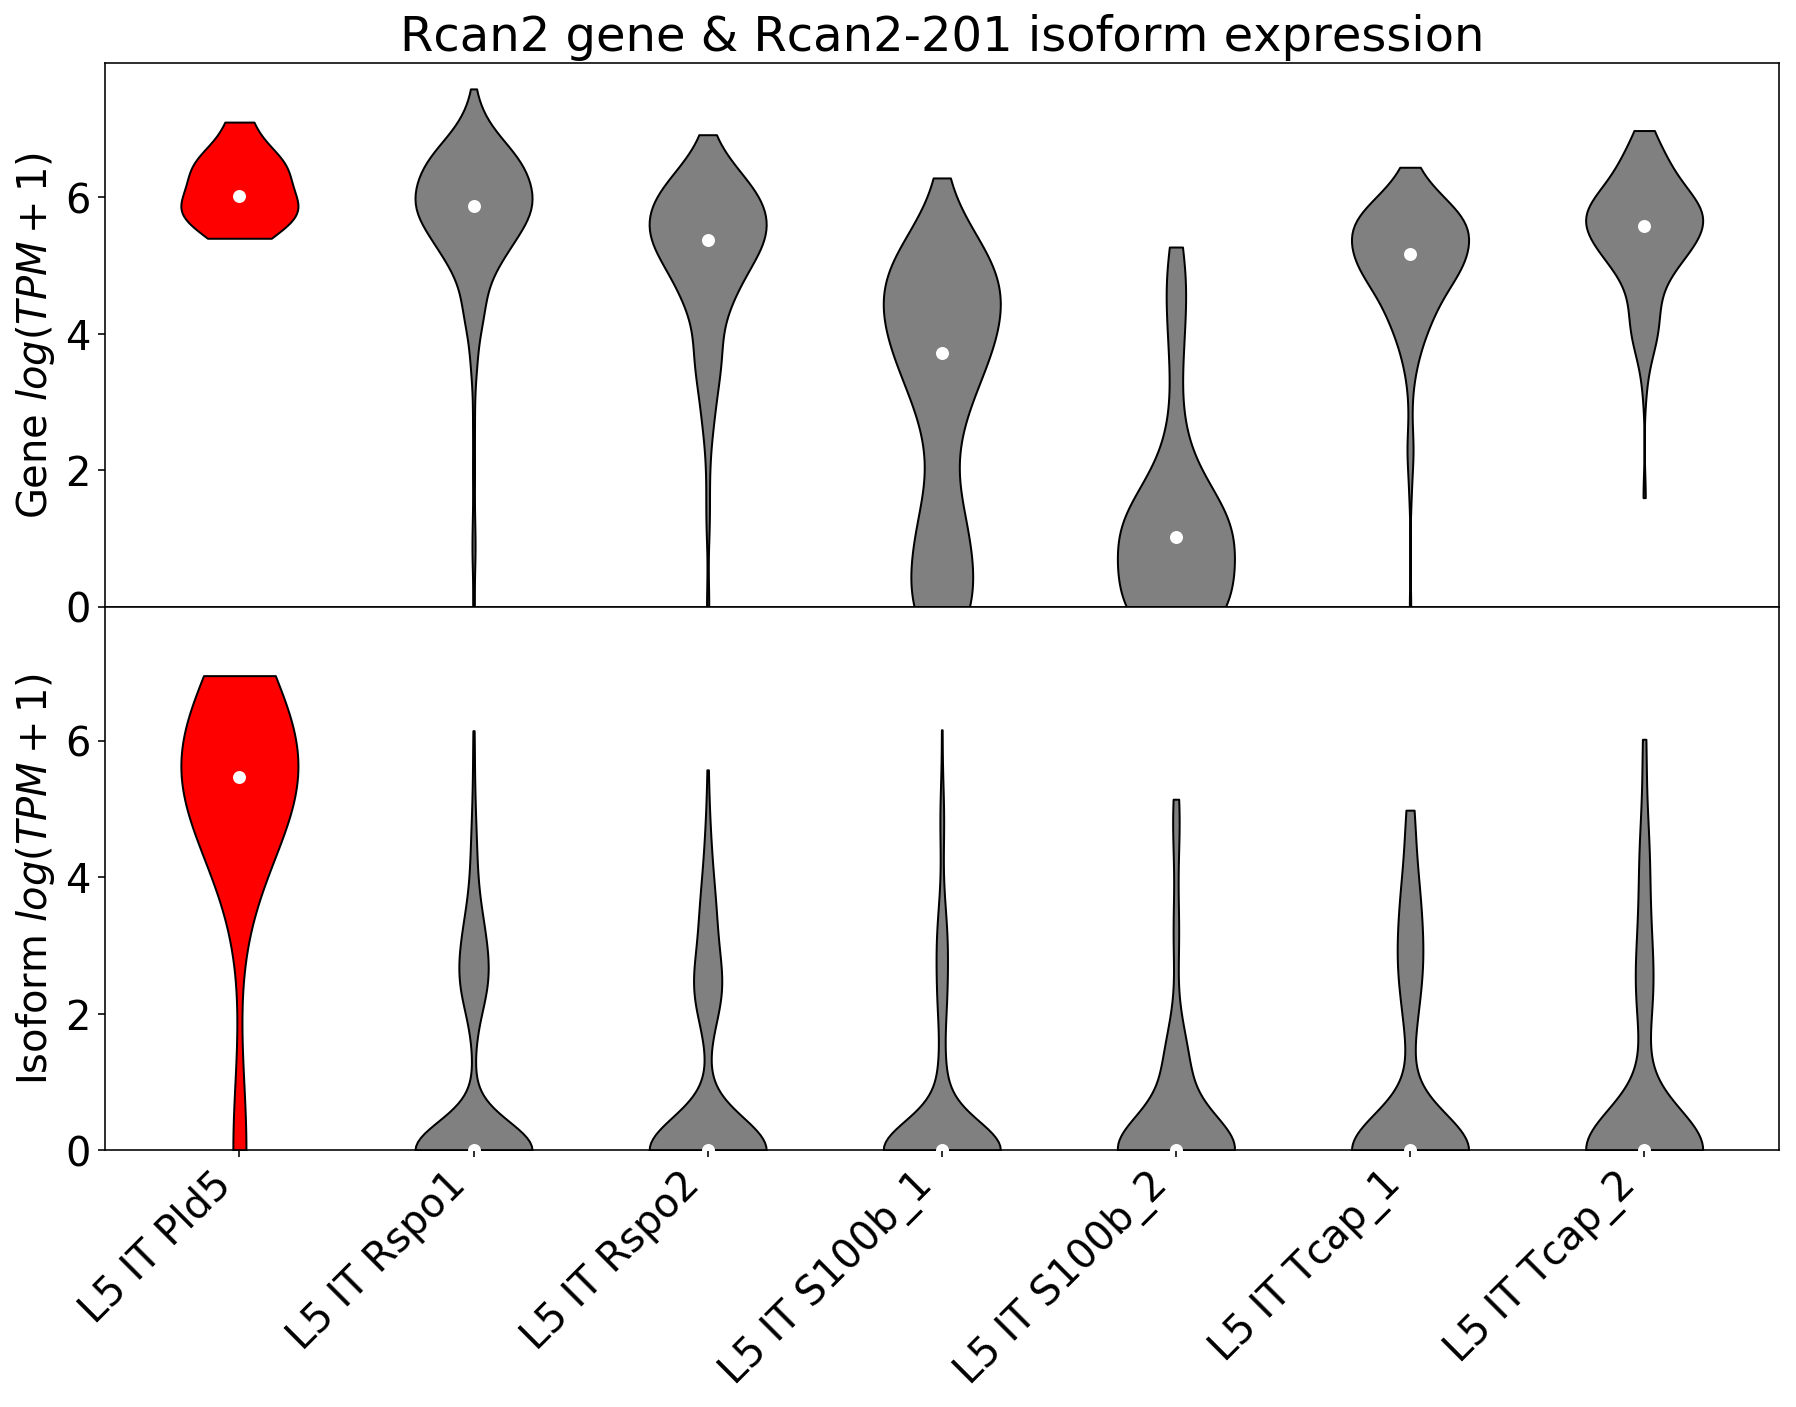

In [271]:


fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

specific_cluster_color = "red"

unique = np.unique(adata.obs.cluster_label)
#unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(adata[adata.obs.cluster_label==c][:,adata.var.gene_name==specific_gene].layers["log1p"]).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(specific_cluster_color)

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

#ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("Gene $log(TPM + 1)$")
ax[0].set_ylim(0)
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.cluster_label==c][:,isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(specific_cluster_color)

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
#ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=45, ha="right", fontsize=20)
ax[1].set_ylabel("Isoform $log(TPM + 1)$")
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("{} gene & {} isoform expression".format(specific_gene, specific_isoform))
tmp_save_name = "".join(specific_cluster.split("/"))
plt.savefig("./level_3_fig/cluster_level_hidden_gene_violin_{}-{}.png".format(tmp_save_name, specific_gene), bbox_inches='tight',dpi=300)
plt.show()

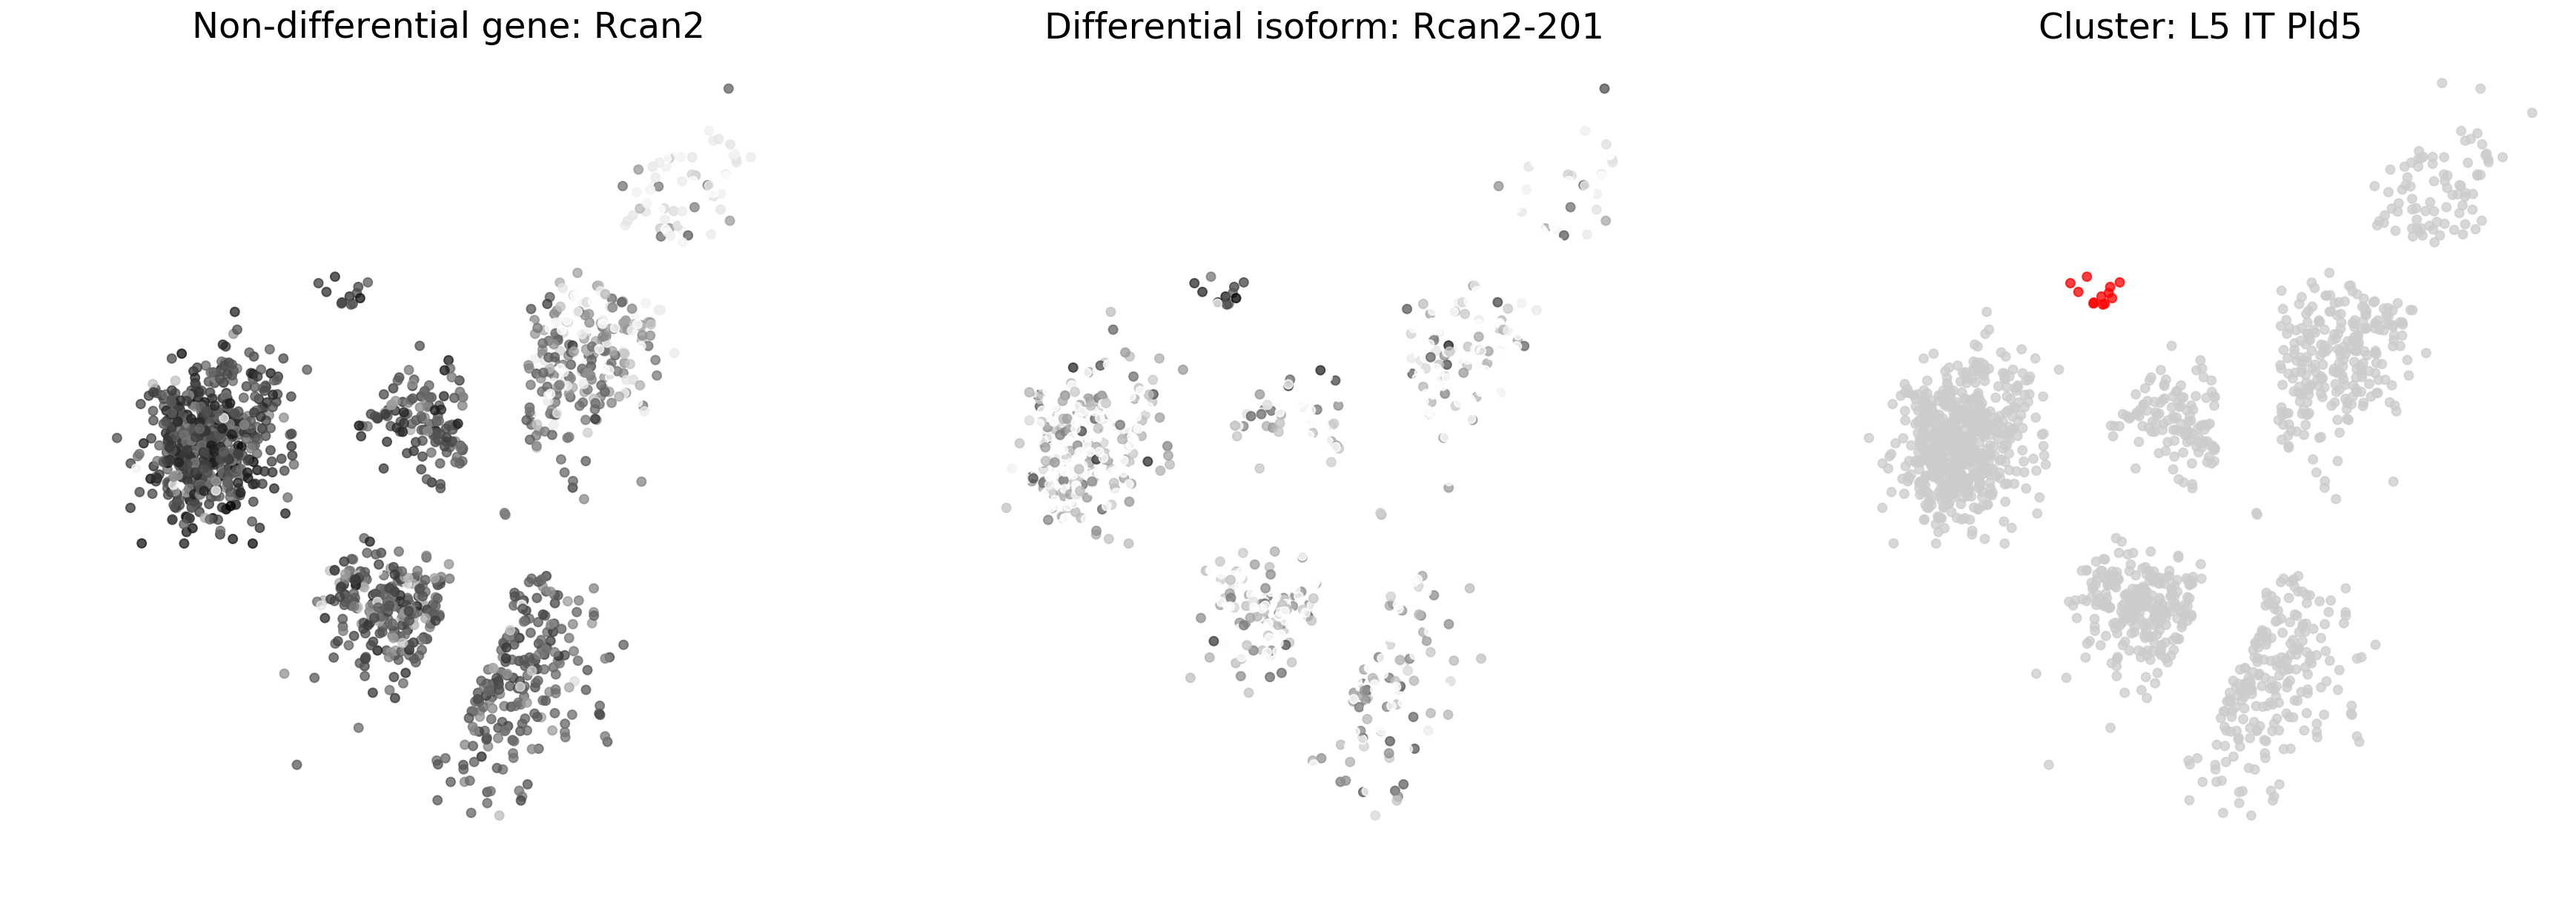

In [273]:

complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(30,10), ncols=3)

x = YY[:,0]
y = YY[:,1]
c = np.asarray(adata[:, adata.var.gene_name==specific_gene].layers["log1p"]).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[0].set_title("Non-differential gene: {}".format(specific_gene))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = YY[:,0]
y = YY[:,1]
c = np.asarray(isoform[isoform.obs.subclass_label==specific_subclass][:, isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Differential isoform: {}".format(specific_isoform))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

x = YY[:,0]
y = YY[:,1]

c = adata.obs["cluster_id"].values.astype(int)

c = ["red"]*adata.shape[0]

indices = np.where(adata.obs["cluster_label"]!=specific_cluster)[0]
replacements=[complement_color]*len(indices)
for (index, replacement) in zip(indices, replacements):
    c[index] = replacement
alpha=0.75
cmap="nipy_spectral_r"

ax[2].scatter(x, y, c=c, cmap="tab20b", alpha=alpha)
ax[2].set_axis_off()
ax[2].set_title("Cluster: {}".format(specific_cluster))
tmp_save_name = "".join(specific_cluster.split("/"))
plt.savefig("./level_3_fig/cluster_level_hidden_gene_nca_{}-{}.png".format(tmp_save_name, specific_gene), bbox_inches='tight',dpi=300)
plt.show()